In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [3]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510,01-03-2012,France,Male,19,19000.0,0
1,15810944,01-04-2012,Italy,Male,35,20000.0,0
2,15668575,01-05-2012,France,Female,26,43000.0,0
3,15603246,01-06-2012,Germany,Female,27,57000.0,0
4,15804002,01-09-2012,France,Male,19,76000.0,0
...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.0,1
399,15706071,08-06-2013,Italy,Male,51,23000.0,1
400,15654296,08-07-2013,Italy,Female,50,20000.0,1
401,15755018,08-08-2013,Germany,Male,36,33000.0,0


In [4]:
dataset.shape

(403, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          403 non-null    int64  
 1   Date             403 non-null    object 
 2   Country          403 non-null    object 
 3   Gender           403 non-null    object 
 4   Age              403 non-null    int64  
 5   EstimatedSalary  401 non-null    float64
 6   Purchased        403 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 22.2+ KB


In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,403.00,403.00,401.00,403.00
mean,15691408.63,37.69,82366.58,0.36
std,71533.72,10.48,248671.57,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626307.50,30.00,43000.00,0.00
50%,15694288.00,37.00,70000.00,0.00
75%,15750195.50,46.00,88000.00,1.00
max,15815236.00,60.00,5000000.00,1.00


### Find Missing values

In [8]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary     True
Purchased          False
dtype: bool

In [9]:
dataset.isnull().sum()

User ID            0
Date               0
Country            0
Gender             0
Age                0
EstimatedSalary    2
Purchased          0
dtype: int64

### Handling Missing values

#### Fill missing value with mean or median or mode

In [10]:
dataset.mean()

User ID           15691408.63
Age                     37.69
EstimatedSalary      82366.58
Purchased                0.36
dtype: float64

In [11]:
dataset.fillna(dataset.mean(), inplace = True)

In [12]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [13]:
dataset.median()

User ID           15694288.00
Age                     37.00
EstimatedSalary      70000.00
Purchased                0.00
dtype: float64

In [14]:
dataset.fillna(dataset.median(), inplace = True)

In [15]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [16]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510,01-03-2012,France,Male,19,19000.00,0
1,15810944,01-04-2012,Italy,Male,35,20000.00,0
2,15668575,01-05-2012,France,Female,26,43000.00,0
3,15603246,01-06-2012,Germany,Female,27,57000.00,0
4,15804002,01-09-2012,France,Male,19,76000.00,0
...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.00,1
399,15706071,08-06-2013,Italy,Male,51,23000.00,1
400,15654296,08-07-2013,Italy,Female,50,20000.00,1
401,15755018,08-08-2013,Germany,Male,36,33000.00,0


In [17]:
dataset.mode().iloc[0,:]

User ID           15674206.00
Date               01-02-2013
Country                 Italy
Gender                 Female
Age                     35.00
EstimatedSalary      72000.00
Purchased                0.00
Name: 0, dtype: object

In [18]:
dataset["EstimatedSalary"].mode()

0   72000.00
Name: EstimatedSalary, dtype: float64

In [19]:
dataset["EstimatedSalary"].fillna(dataset["EstimatedSalary"].mode()[0], inplace = True)

In [20]:
dataset.fillna(dataset.mode().iloc[0,:], inplace = True)

In [21]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### Fill with Groupby

In [23]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [24]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary     True
Purchased          False
dtype: bool

In [25]:
dataset[dataset["EstimatedSalary"].isnull()]

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
10,15570769,1/18/2012,Italy,Female,26,NaN,0
167,15762228,8/30/2012,France,Female,22,NaN,0


In [26]:
gp_c = dataset.groupby("Country")

In [27]:
gp_c["EstimatedSalary"].agg("mean")

Country
France      107072.00
Germany      71484.85
Germany&     36000.00
Italy        71364.29
]Germany&    39000.00
]Italy&      71500.00
Name: EstimatedSalary, dtype: float64

In [28]:
missing_values_df = dataset[dataset["EstimatedSalary"].isnull()]

In [29]:
missing_values_df

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
10,15570769,1/18/2012,Italy,Female,26,NaN,0
167,15762228,8/30/2012,France,Female,22,NaN,0


In [30]:
gp_c["EstimatedSalary"].mean()

Country
France      107072.00
Germany      71484.85
Germany&     36000.00
Italy        71364.29
]Germany&    39000.00
]Italy&      71500.00
Name: EstimatedSalary, dtype: float64

In [31]:
missing_values_df

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
10,15570769,1/18/2012,Italy,Female,26,NaN,0
167,15762228,8/30/2012,France,Female,22,NaN,0


In [32]:
for data in missing_values_df.iterrows():
    print(data[0])    
    print(data[1])

10
User ID             15570769
Date               1/18/2012
Country                Italy
Gender                Female
Age                       26
EstimatedSalary          NaN
Purchased                  0
Name: 10, dtype: object
167
User ID             15762228
Date               8/30/2012
Country               France
Gender                Female
Age                       22
EstimatedSalary          NaN
Purchased                  0
Name: 167, dtype: object


In [33]:
dataset.loc[10,"EstimatedSalary"] = 1000

In [34]:
salary_mean = dataset.groupby("Country")["EstimatedSalary"].mean()
for idx, row in missing_values_df.iterrows():
    print("Index:::",idx)
    print(row["Country"])
    country = row["Country"]
    print(salary_mean[country])
    dataset.loc[idx,"EstimatedSalary"] = salary_mean[country]

Index::: 10
Italy
70865.24822695035
Index::: 167
France
107072.0


In [35]:
dataset.loc[[10,167],:]

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
10,15570769,1/18/2012,Italy,Female,26,70865.25,0
167,15762228,8/30/2012,France,Female,22,107072.00,0


In [36]:
def fillna_groupby(df, target_col, groupby_col, stat = "mean"):
    missing_values_df = df[df[target_col].isnull()]
    target_stat = df.groupby(groupby_col)[target_col].agg(stat)
    for idx, row in missing_values_df.iterrows():
        g_col = row[groupby_col]
        df.loc[idx,target_col] = target_stat[g_col]
    return df

In [38]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [39]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary     True
Purchased          False
dtype: bool

In [40]:
dataset = fillna_groupby(dataset, "EstimatedSalary", "Country", "median")

In [41]:
dataset.loc[[10,167],:]

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
10,15570769,1/18/2012,Italy,Female,26,65000.00,0
167,15762228,8/30/2012,France,Female,22,68000.00,0


In [42]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [43]:
dataset["Age"].min(),dataset["Age"].max()

(18, 60)

In [44]:
np.linspace(dataset["Age"].min(),dataset["Age"].max(), 6, dtype = "int")

array([18, 26, 34, 43, 51, 60])

In [45]:
dataset["Age_Bins"] = pd.cut(dataset["Age"], bins = [15, 25, 35, 45, 65])

In [46]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased,Age_Bins
0,15624510,01-03-2012,France,Male,19,19000.00,0,"(15, 25]"
1,15810944,01-04-2012,Italy,Male,35,20000.00,0,"(25, 35]"
2,15668575,01-05-2012,France,Female,26,43000.00,0,"(25, 35]"
3,15603246,01-06-2012,Germany,Female,27,57000.00,0,"(25, 35]"
4,15804002,01-09-2012,France,Male,19,76000.00,0,"(15, 25]"
...,...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.00,1,"(45, 65]"
399,15706071,08-06-2013,Italy,Male,51,23000.00,1,"(45, 65]"
400,15654296,08-07-2013,Italy,Female,50,20000.00,1,"(45, 65]"
401,15755018,08-08-2013,Germany,Male,36,33000.00,0,"(35, 45]"


In [48]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [49]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary     True
Purchased          False
dtype: bool

In [50]:
dataset["Age_Bins"] = pd.cut(dataset["Age"], bins = [15, 25, 35, 45, 65])

In [51]:
dataset = fillna_groupby(dataset, "EstimatedSalary", "Age_Bins", "median")

In [52]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
Age_Bins           False
dtype: bool

In [53]:
dataset.loc[[10,167],:]

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased,Age_Bins
10,15570769,1/18/2012,Italy,Female,26,63500.00,0,"(25, 35]"
167,15762228,8/30/2012,France,Female,22,60500.00,0,"(15, 25]"


In [55]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [56]:
dataset.ffill().loc[8:12]

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
8,15600575,1/13/2012,Italy,Male,25,33000.00,0
9,15727311,1/17/2012,Germany,Female,35,65000.00,0
10,15570769,1/18/2012,Italy,Female,26,65000.00,0
11,15606274,1/19/2012,France,Female,26,52000.00,0
12,15746139,1/20/2012,Italy,Male,20,86000.00,0


### Fill with Random value

In [57]:
import random

In [58]:
random.choice(dataset["EstimatedSalary"])

18000.0

In [60]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [61]:
fill_random = lambda x : random.choice(dataset["EstimatedSalary"]) if pd.isna(x) else x

In [62]:
dataset["EstimatedSalary"] = dataset["EstimatedSalary"].apply(fill_random)

### Drop the missing values

In [63]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Purchase Prediction\Social_Network_Ads_1.csv")

In [64]:
(dataset.isnull().sum().sum() / len(dataset)) * 100

0.49627791563275436

In [65]:
dataset.dropna(inplace = True)

In [66]:
dataset.isnull().any()

User ID            False
Date               False
Country            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [67]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510,01-03-2012,France,Male,19,19000.00,0
1,15810944,01-04-2012,Italy,Male,35,20000.00,0
2,15668575,01-05-2012,France,Female,26,43000.00,0
3,15603246,01-06-2012,Germany,Female,27,57000.00,0
4,15804002,01-09-2012,France,Male,19,76000.00,0
...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.00,1
399,15706071,08-06-2013,Italy,Male,51,23000.00,1
400,15654296,08-07-2013,Italy,Female,50,20000.00,1
401,15755018,08-08-2013,Germany,Male,36,33000.00,0


### Find Outliers

In [68]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510,01-03-2012,France,Male,19,19000.00,0
1,15810944,01-04-2012,Italy,Male,35,20000.00,0
2,15668575,01-05-2012,France,Female,26,43000.00,0
3,15603246,01-06-2012,Germany,Female,27,57000.00,0
4,15804002,01-09-2012,France,Male,19,76000.00,0
...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.00,1
399,15706071,08-06-2013,Italy,Male,51,23000.00,1
400,15654296,08-07-2013,Italy,Female,50,20000.00,1
401,15755018,08-08-2013,Germany,Male,36,33000.00,0


<AxesSubplot:>

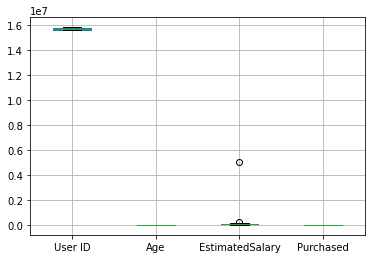

In [69]:
dataset.boxplot()

<AxesSubplot:xlabel='Age'>

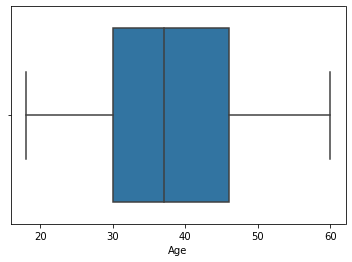

In [70]:
sns.boxplot(dataset["Age"])

<AxesSubplot:xlabel='EstimatedSalary'>

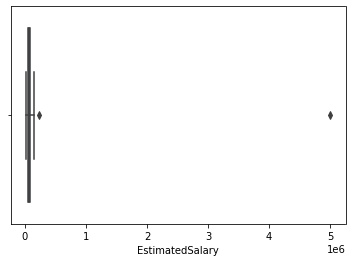

In [71]:
sns.boxplot(dataset["EstimatedSalary"])

In [72]:
def find_outliers(dataset, column, verbose = False):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    IQR = q3 - q1
    lower_boundary = q1 - (1.5 * IQR)
    upper_boundary = q3 + (1.5 * IQR)
    print(upper_boundary)
    outliers = dataset[(dataset[column] < lower_boundary) | (dataset[column] > upper_boundary)]
    if verbose:
        display(outliers)
        print("Outilers Percentage :: ", (len(outliers) / len(dataset)) * 100, "%")
    return outliers

In [73]:
outliers_salary = find_outliers(dataset, "EstimatedSalary", verbose = True)

155500.0


,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
161,15734234,8/22/2012,France,Male,36,5000000.00,1
281,15613334,2/15/2013,Italy,Female,54,233000.00,1


Outilers Percentage ::  0.4987531172069825 %


### Handle outliers

In [74]:
outliers_salary.index

Int64Index([161, 281], dtype='int64')

In [75]:
dataset.drop(outliers_salary.index, axis = 0, inplace = True)

<AxesSubplot:xlabel='EstimatedSalary'>

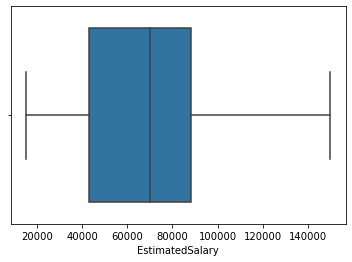

In [76]:
sns.boxplot(dataset["EstimatedSalary"])

In [77]:
#Task -- Code for replacing the outilers

In [78]:
outliers_salary

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
161,15734234,8/22/2012,France,Male,36,5000000.00,1
281,15613334,2/15/2013,Italy,Female,54,233000.00,1


###### Approch-3 -- Remove the extra zeros

In [79]:
#500000
for idx, row in outliers_salary.iterrows():
    if row["EstimatedSalary"] > 500000:
        new_value = row["EstimatedSalary"] / 100
        dataset.loc[idx , "EstimatedSalary"] = new_value

In [80]:
find_outliers(dataset, "EstimatedSalary")

155500.0


,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased


### Handling categorical data

In [81]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510.00,01-03-2012,France,Male,19.00,19000.00,0.00
1,15810944.00,01-04-2012,Italy,Male,35.00,20000.00,0.00
2,15668575.00,01-05-2012,France,Female,26.00,43000.00,0.00
3,15603246.00,01-06-2012,Germany,Female,27.00,57000.00,0.00
4,15804002.00,01-09-2012,France,Male,19.00,76000.00,0.00
...,...,...,...,...,...,...,...
399,15706071.00,08-06-2013,Italy,Male,51.00,23000.00,1.00
400,15654296.00,08-07-2013,Italy,Female,50.00,20000.00,1.00
401,15755018.00,08-08-2013,Germany,Male,36.00,33000.00,0.00
402,15594041.00,08-09-2013,Germany&,Female,49.00,36000.00,1.00


In [82]:
dataset["Country"].unique()

array(['France', 'Italy', 'Germany', ']Italy&', ']Germany&', 'Germany&',
       nan], dtype=object)

In [83]:
dataset["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [84]:
import re

In [85]:
s = ']Italy&'

In [86]:
re.sub("[^A-Za-z]", "", s)

'Italy'

In [89]:
# dataset["Country"] = dataset["Country"].apply(lambda data : re.sub("[^A-Za-z]", "", data))

In [90]:
dataset["Country"].unique()

array(['France', 'Italy', 'Germany', ']Italy&', ']Germany&', 'Germany&',
       nan], dtype=object)

### Encoding the categorical text data

###### One Hot Encoding

In [91]:
#dataset
#columns -- list the columns to apply One hot encoding


dataset_pd = pd.get_dummies(dataset, columns = ["Gender","Country"])

In [92]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510.00,01-03-2012,France,Male,19.00,19000.00,0.00
1,15810944.00,01-04-2012,Italy,Male,35.00,20000.00,0.00
2,15668575.00,01-05-2012,France,Female,26.00,43000.00,0.00
3,15603246.00,01-06-2012,Germany,Female,27.00,57000.00,0.00
4,15804002.00,01-09-2012,France,Male,19.00,76000.00,0.00
...,...,...,...,...,...,...,...
399,15706071.00,08-06-2013,Italy,Male,51.00,23000.00,1.00
400,15654296.00,08-07-2013,Italy,Female,50.00,20000.00,1.00
401,15755018.00,08-08-2013,Germany,Male,36.00,33000.00,0.00
402,15594041.00,08-09-2013,Germany&,Female,49.00,36000.00,1.00


### OHE using SKlearn

In [25]:
#ColumnTransfomer

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
#object of OHE
oh = OneHotEncoder()

In [39]:
#list of tuples

#remainder -- the operation for remaining columns
            #--drop -- 
            #passthrough
ct = ColumnTransformer(transformers = [("ohe", oh, ["Gender","Country"])], remainder = "passthrough")

In [40]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(),
                                 ['Gender', 'Country'])])

In [41]:
dataset = ct.fit_transform(dataset)

In [93]:
dataset = pd.DataFrame(dataset, columns = ct.get_feature_names())

In [43]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,User ID,Date,Age,EstimatedSalary,Purchased
0,0.00,1.00,1.00,0.00,0.00,15624510,01-03-2012,19,19000.00,0
1,0.00,1.00,0.00,0.00,1.00,15810944,01-04-2012,35,20000.00,0
2,1.00,0.00,1.00,0.00,0.00,15668575,01-05-2012,26,43000.00,0
3,1.00,0.00,0.00,1.00,0.00,15603246,01-06-2012,27,57000.00,0
4,0.00,1.00,1.00,0.00,0.00,15804002,01-09-2012,19,76000.00,0
...,...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,15691863,08-05-2013,46,41000.00,1
397,0.00,1.00,0.00,0.00,1.00,15706071,08-06-2013,51,23000.00,1
398,1.00,0.00,0.00,0.00,1.00,15654296,08-07-2013,50,20000.00,1
399,0.00,1.00,0.00,1.00,0.00,15755018,08-08-2013,36,33000.00,0


In [94]:
dataset.var()

###### Remove unwanted columns

In [44]:
dataset.drop("User ID", axis = 1,inplace = True)

In [45]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Date,Age,EstimatedSalary,Purchased
0,0.00,1.00,1.00,0.00,0.00,01-03-2012,19,19000.00,0
1,0.00,1.00,0.00,0.00,1.00,01-04-2012,35,20000.00,0
2,1.00,0.00,1.00,0.00,0.00,01-05-2012,26,43000.00,0
3,1.00,0.00,0.00,1.00,0.00,01-06-2012,27,57000.00,0
4,0.00,1.00,1.00,0.00,0.00,01-09-2012,19,76000.00,0
...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,08-05-2013,46,41000.00,1
397,0.00,1.00,0.00,0.00,1.00,08-06-2013,51,23000.00,1
398,1.00,0.00,0.00,0.00,1.00,08-07-2013,50,20000.00,1
399,0.00,1.00,0.00,1.00,0.00,08-08-2013,36,33000.00,0


###### Handling Date feature

In [46]:
dataset.dtypes

ohe__x0_Female     object
ohe__x0_Male       object
ohe__x1_France     object
ohe__x1_Germany    object
ohe__x1_Italy      object
Date               object
Age                object
EstimatedSalary    object
Purchased          object
dtype: object

In [47]:
dataset["Date"] = pd.to_datetime(dataset["Date"])#yyyy-mm--dd

In [48]:
dataset.dtypes

ohe__x0_Female             object
ohe__x0_Male               object
ohe__x1_France             object
ohe__x1_Germany            object
ohe__x1_Italy              object
Date               datetime64[ns]
Age                        object
EstimatedSalary            object
Purchased                  object
dtype: object

In [49]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Date,Age,EstimatedSalary,Purchased
0,0.00,1.00,1.00,0.00,0.00,2012-01-03,19,19000.00,0
1,0.00,1.00,0.00,0.00,1.00,2012-01-04,35,20000.00,0
2,1.00,0.00,1.00,0.00,0.00,2012-01-05,26,43000.00,0
3,1.00,0.00,0.00,1.00,0.00,2012-01-06,27,57000.00,0
4,0.00,1.00,1.00,0.00,0.00,2012-01-09,19,76000.00,0
...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,2013-08-05,46,41000.00,1
397,0.00,1.00,0.00,0.00,1.00,2013-08-06,51,23000.00,1
398,1.00,0.00,0.00,0.00,1.00,2013-08-07,50,20000.00,1
399,0.00,1.00,0.00,1.00,0.00,2013-08-08,36,33000.00,0


In [50]:
dataset["Year"] = dataset["Date"].dt.year

In [51]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Date,Age,EstimatedSalary,Purchased,Year
0,0.00,1.00,1.00,0.00,0.00,2012-01-03,19,19000.00,0,2012
1,0.00,1.00,0.00,0.00,1.00,2012-01-04,35,20000.00,0,2012
2,1.00,0.00,1.00,0.00,0.00,2012-01-05,26,43000.00,0,2012
3,1.00,0.00,0.00,1.00,0.00,2012-01-06,27,57000.00,0,2012
4,0.00,1.00,1.00,0.00,0.00,2012-01-09,19,76000.00,0,2012
...,...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,2013-08-05,46,41000.00,1,2013
397,0.00,1.00,0.00,0.00,1.00,2013-08-06,51,23000.00,1,2013
398,1.00,0.00,0.00,0.00,1.00,2013-08-07,50,20000.00,1,2013
399,0.00,1.00,0.00,1.00,0.00,2013-08-08,36,33000.00,0,2013


In [52]:
dataset["Month"] = dataset["Date"].dt.month
dataset["Day"] = dataset["Date"].dt.day

In [53]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Date,Age,EstimatedSalary,Purchased,Year,Month,Day
0,0.00,1.00,1.00,0.00,0.00,2012-01-03,19,19000.00,0,2012,1,3
1,0.00,1.00,0.00,0.00,1.00,2012-01-04,35,20000.00,0,2012,1,4
2,1.00,0.00,1.00,0.00,0.00,2012-01-05,26,43000.00,0,2012,1,5
3,1.00,0.00,0.00,1.00,0.00,2012-01-06,27,57000.00,0,2012,1,6
4,0.00,1.00,1.00,0.00,0.00,2012-01-09,19,76000.00,0,2012,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,2013-08-05,46,41000.00,1,2013,8,5
397,0.00,1.00,0.00,0.00,1.00,2013-08-06,51,23000.00,1,2013,8,6
398,1.00,0.00,0.00,0.00,1.00,2013-08-07,50,20000.00,1,2013,8,7
399,0.00,1.00,0.00,1.00,0.00,2013-08-08,36,33000.00,0,2013,8,8


In [54]:
#Derived features

dataset["Day of Week"] = dataset["Date"].dt.dayofweek

In [95]:
dataset["Week"] = dataset["Date"].dt.week

In [56]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Date,Age,EstimatedSalary,Purchased,Year,Month,Day,Day of Week,Week
0,0.00,1.00,1.00,0.00,0.00,2012-01-03,19,19000.00,0,2012,1,3,1,1
1,0.00,1.00,0.00,0.00,1.00,2012-01-04,35,20000.00,0,2012,1,4,2,1
2,1.00,0.00,1.00,0.00,0.00,2012-01-05,26,43000.00,0,2012,1,5,3,1
3,1.00,0.00,0.00,1.00,0.00,2012-01-06,27,57000.00,0,2012,1,6,4,1
4,0.00,1.00,1.00,0.00,0.00,2012-01-09,19,76000.00,0,2012,1,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,2013-08-05,46,41000.00,1,2013,8,5,0,32
397,0.00,1.00,0.00,0.00,1.00,2013-08-06,51,23000.00,1,2013,8,6,1,32
398,1.00,0.00,0.00,0.00,1.00,2013-08-07,50,20000.00,1,2013,8,7,2,32
399,0.00,1.00,0.00,1.00,0.00,2013-08-08,36,33000.00,0,2013,8,8,3,32


In [57]:
dataset.drop("Date", axis = 1, inplace = True)

In [58]:
dataset.dtypes

ohe__x0_Female     object
ohe__x0_Male       object
ohe__x1_France     object
ohe__x1_Germany    object
ohe__x1_Italy      object
Age                object
EstimatedSalary    object
Purchased          object
Year                int64
Month               int64
Day                 int64
Day of Week         int64
Week                int64
dtype: object

In [59]:
dataset = dataset.astype("float")

In [60]:
dataset.dtypes

ohe__x0_Female     float64
ohe__x0_Male       float64
ohe__x1_France     float64
ohe__x1_Germany    float64
ohe__x1_Italy      float64
Age                float64
EstimatedSalary    float64
Purchased          float64
Year               float64
Month              float64
Day                float64
Day of Week        float64
Week               float64
dtype: object

In [61]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Age,EstimatedSalary,Purchased,Year,Month,Day,Day of Week,Week
0,0.00,1.00,1.00,0.00,0.00,19.00,19000.00,0.00,2012.00,1.00,3.00,1.00,1.00
1,0.00,1.00,0.00,0.00,1.00,35.00,20000.00,0.00,2012.00,1.00,4.00,2.00,1.00
2,1.00,0.00,1.00,0.00,0.00,26.00,43000.00,0.00,2012.00,1.00,5.00,3.00,1.00
3,1.00,0.00,0.00,1.00,0.00,27.00,57000.00,0.00,2012.00,1.00,6.00,4.00,1.00
4,0.00,1.00,1.00,0.00,0.00,19.00,76000.00,0.00,2012.00,1.00,9.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,46.00,41000.00,1.00,2013.00,8.00,5.00,0.00,32.00
397,0.00,1.00,0.00,0.00,1.00,51.00,23000.00,1.00,2013.00,8.00,6.00,1.00,32.00
398,1.00,0.00,0.00,0.00,1.00,50.00,20000.00,1.00,2013.00,8.00,7.00,2.00,32.00
399,0.00,1.00,0.00,1.00,0.00,36.00,33000.00,0.00,2013.00,8.00,8.00,3.00,32.00


##### Split Dependent and Independent variables

In [62]:
X = dataset.drop("Purchased", axis = 1)

In [63]:
X

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Age,EstimatedSalary,Year,Month,Day,Day of Week,Week
0,0.00,1.00,1.00,0.00,0.00,19.00,19000.00,2012.00,1.00,3.00,1.00,1.00
1,0.00,1.00,0.00,0.00,1.00,35.00,20000.00,2012.00,1.00,4.00,2.00,1.00
2,1.00,0.00,1.00,0.00,0.00,26.00,43000.00,2012.00,1.00,5.00,3.00,1.00
3,1.00,0.00,0.00,1.00,0.00,27.00,57000.00,2012.00,1.00,6.00,4.00,1.00
4,0.00,1.00,1.00,0.00,0.00,19.00,76000.00,2012.00,1.00,9.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
396,1.00,0.00,1.00,0.00,0.00,46.00,41000.00,2013.00,8.00,5.00,0.00,32.00
397,0.00,1.00,0.00,0.00,1.00,51.00,23000.00,2013.00,8.00,6.00,1.00,32.00
398,1.00,0.00,0.00,0.00,1.00,50.00,20000.00,2013.00,8.00,7.00,2.00,32.00
399,0.00,1.00,0.00,1.00,0.00,36.00,33000.00,2013.00,8.00,8.00,3.00,32.00


In [64]:
y = dataset["Purchased"]

In [65]:
y

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
      ... 
396   1.00
397   1.00
398   1.00
399   0.00
400   1.00
Name: Purchased, Length: 401, dtype: float64

##### Split dataset into Train and Test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [68]:
X_train

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Age,EstimatedSalary,Year,Month,Day,Day of Week,Week
218,0.00,1.00,0.00,0.00,1.00,40.00,78000.00,2012.00,11.00,15.00,3.00,46.00
151,0.00,1.00,0.00,0.00,1.00,41.00,45000.00,2012.00,8.00,8.00,2.00,32.00
100,0.00,1.00,1.00,0.00,0.00,27.00,88000.00,2012.00,5.00,25.00,4.00,21.00
375,1.00,0.00,0.00,1.00,0.00,37.00,80000.00,2013.00,7.00,5.00,4.00,27.00
102,1.00,0.00,0.00,0.00,1.00,32.00,86000.00,2012.00,5.00,30.00,2.00,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.00,1.00,1.00,0.00,0.00,38.00,71000.00,2013.00,6.00,26.00,2.00,26.00
320,0.00,1.00,1.00,0.00,0.00,36.00,60000.00,2013.00,4.00,17.00,2.00,16.00
15,0.00,1.00,0.00,1.00,0.00,29.00,80000.00,2012.00,1.00,25.00,2.00,4.00
125,1.00,0.00,1.00,0.00,0.00,39.00,61000.00,2012.00,7.00,2.00,0.00,27.00


In [69]:
y_train

218   0.00
151   0.00
100   0.00
375   0.00
102   0.00
      ... 
369   0.00
320   0.00
15    0.00
125   0.00
265   1.00
Name: Purchased, Length: 320, dtype: float64

#### Feature Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
#create object of MinMaxScaler
sc = MinMaxScaler()

In [72]:
X_train_scaled = sc.fit_transform(X_train)

In [73]:
X_train_scaled

array([[0.        , 1.        , 0.        , ..., 0.46666667, 0.75      ,
        0.88235294],
       [0.        , 1.        , 0.        , ..., 0.23333333, 0.5       ,
        0.60784314],
       [0.        , 1.        , 1.        , ..., 0.8       , 1.        ,
        0.39215686],
       ...,
       [0.        , 1.        , 0.        , ..., 0.8       , 0.5       ,
        0.05882353],
       [1.        , 0.        , 1.        , ..., 0.03333333, 0.        ,
        0.50980392],
       [0.        , 1.        , 0.        , ..., 0.8       , 1.        ,
        0.05882353]])

In [74]:
X_test_scaled = sc.transform(X_test)

# Building the ML Model

In [94]:
#Import the Model class
from sklearn.linear_model import LogisticRegression

In [112]:
#Create a instance or object of the model

lor_model = LogisticRegression()

In [113]:
# Train the ML Model -- Feed the data to the ML Algorithm

lor_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [114]:
#lor_model --- Trained model

### Prediction

In [115]:
X_test_scaled

array([[1.        , 0.        , 0.        , 0.        , 1.        ,
        0.35714286, 0.33333333, 0.        , 0.72727273, 0.83333333,
        0.5       , 0.74509804],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.45238095, 0.41481481, 0.        , 0.45454545, 0.36666667,
        0.25      , 0.45098039],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.47619048, 0.2962963 , 1.        , 0.36363636, 0.43333333,
        0.25      , 0.37254902],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.19047619, 0.48148148, 0.        , 0.81818182, 0.53333333,
        0.5       , 0.80392157],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        0.11904762, 0.24444444, 0.        , 0.18181818, 0.73333333,
        1.        , 0.21568627],
       [1.        , 0.        , 0.        , 1.        , 0.        ,
        0.95238095, 0.05925926, 1.        , 0.54545455, 0.36666667,
        1.        ,

In [116]:
y_pred = lor_model.predict(X_test_scaled)

In [117]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.])

In [118]:
y_test

184   0.00
111   0.00
339   0.00
199   0.00
56    0.00
      ... 
189   0.00
253   1.00
64    0.00
27    1.00
294   0.00
Name: Purchased, Length: 81, dtype: float64

### Evaluation

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
test_accuracy = accuracy_score(y_test, y_pred)

In [121]:
test_accuracy

0.8765432098765432

In [122]:
print("Test Accuracy Score::", test_accuracy * 100, " %")

Test Accuracy Score:: 87.65432098765432  %


In [123]:
#
y_pred_train = lor_model.predict(X_train_scaled)

In [124]:
train_accuracy = accuracy_score(y_train, y_pred_train)

In [125]:
train_accuracy

0.83125

In [126]:
print("Train Accuracy Score::", train_accuracy * 100, " %")

Train Accuracy Score:: 83.125  %


### Real time prediction

In [132]:
new_point = X_test.iloc[20:21,:]

In [134]:
new_point

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Italy,Age,EstimatedSalary,Year,Month,Day,Day of Week,Week
47,1.00,0.00,0.00,1.00,0.00,27.00,54000.00,2012.00,3.00,12.00,0.00,11.00


In [136]:
new_point = sc.transform(new_point)

In [137]:
lor_model.predict(new_point)

array([0.])

### Save the model

In [139]:
import joblib

In [140]:
#object -- model
# filename
joblib.dump(lor_model,"purchase_prediction.pkl")

['purchase_prediction.pkl']